In [24]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Импортируем необходимые библиотеки и присваиваем им сокращенные названия.

In [25]:
# Importing the dataset
df = pd.read_csv('kr2.csv', sep=',')

Импортируем файл с данными используя библиотеку пандас.

In [26]:
df

,Age,Sex,ALB,ALT,AST,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,7.7,22.1,3.23,106.0,12.1,69.0,0
1,32,m,38.5,18.0,24.7,4.80,74.0,15.6,76.5,0
2,32,m,46.9,36.2,52.6,5.20,86.0,33.2,79.3,0
3,32,m,43.2,30.6,22.6,4.74,80.0,33.8,75.7,0
4,32,m,39.2,32.6,24.8,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,5.9,110.3,6.30,55.7,650.9,68.5,1
611,64,f,24.0,2.9,44.4,3.02,63.0,35.9,71.3,1
612,64,f,29.0,3.5,99.0,3.63,66.7,64.2,82.0,1
613,46,f,33.0,39.0,62.0,4.20,52.0,50.0,71.0,1


Выводим датасет на экран. Количество наблюдений 615, количество факторов из них 8 количественные и 1 качественный.

In [27]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
CHOL,10,0.016260
PROT,1,0.001626
ALT,1,0.001626
ALB,1,0.001626
Category,0,0.000000
GGT,0,0.000000
CREA,0,0.000000
AST,0,0.000000
Sex,0,0.000000
Age,0,0.000000


Проверяем наличие пропусков, присутствуют они только в числовых значениях.

In [28]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

Избавляемся от пропусков, заполняя их средними значениями.

In [29]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

In [30]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.0
PROT,0,0.0
GGT,0,0.0
CREA,0,0.0
CHOL,0,0.0
AST,0,0.0
ALT,0,0.0
ALB,0,0.0
Sex,0,0.0
Age,0,0.0


Делаем конечную проверку на наличие пропусков и убеждаемся, что их нет.

In [31]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

Кодируем качественные переменные.

In [32]:
# Encoding categorical data
df = encoding_char(df)

Полученные результаты запишем в исходный датасет.

In [33]:
df

,Age,Sex,ALB,ALT,AST,CHOL,CREA,GGT,PROT,Category
0,32.0,0,38.5,7.7,22.1,3.23,106.0,12.1,69.0,0.0
1,32.0,0,38.5,18.0,24.7,4.80,74.0,15.6,76.5,0.0
2,32.0,0,46.9,36.2,52.6,5.20,86.0,33.2,79.3,0.0
3,32.0,0,43.2,30.6,22.6,4.74,80.0,33.8,75.7,0.0
4,32.0,0,39.2,32.6,24.8,4.32,76.0,29.9,68.7,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,1,32.0,5.9,110.3,6.30,55.7,650.9,68.5,1.0
611,64.0,1,24.0,2.9,44.4,3.02,63.0,35.9,71.3,1.0
612,64.0,1,29.0,3.5,99.0,3.63,66.7,64.2,82.0,1.0
613,46.0,1,33.0,39.0,62.0,4.20,52.0,50.0,71.0,1.0


Посмотрим как выглядит таблица после кодирования, можем видеть, что теперь все переменные являются числовыми и можно с ними работать.

In [80]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.302757
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.239     
Dependent Variable: y                AIC:              315.9126  
Date:               2020-11-23 12:53 BIC:              353.6989  
No. Observations:   492              Log-Likelihood:   -148.96   
Df Model:           8                LL-Null:          -195.80   
Df Residuals:       483              LLR p-value:      8.2841e-17
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.0761      0.1593    -0.4779    0.6327    -0.3883     0.2361
x2     0.1623      0.1663     0.9761    0.3290    -0.1

In [34]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Разделим наш датасет на обучающую и тестовую выборки в пропорции 20% / 80%.

In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

Проведем шкалирование данных с помощью библиотеки sklearn.preprocessing, также стоит обратить внимание, что наша эндогенная переменная в шкалировании не нуждается, она уже должна быть дискретного типа (0;1).

In [36]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.302757
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.239     
Dependent Variable: y                AIC:              315.9126  
Date:               2020-11-23 14:01 BIC:              353.6989  
No. Observations:   492              Log-Likelihood:   -148.96   
Df Model:           8                LL-Null:          -195.80   
Df Residuals:       483              LLR p-value:      8.2841e-17
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.0761      0.1593    -0.4779    0.6327    -0.3883     0.2361
x2     0.1623      0.1663     0.9761    0.3290    -0.1

Построим базовую модель и посмотрим отчет по этой модели. Можем видеть, что 5 переменных значимые, p-value по остальным переменным превышает 1,29% и я не буду использовать для построения классификаторов.

In [37]:
# p-value < 1,29% Features
X_train = X_train[:,[0, 3, 4, 5, 7]]
X_test = X_test[:,[0, 3, 4, 5, 7]]

Преобразуем тестовую и обучающие выборки, оставив в нех только значимые переменные.

In [82]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

Обучим модель логистической регрессии.

In [83]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.9349593495934959

Оцениваем качество модели, видим что уровень качества очень высокий, то есть больше 93% объектов распознаны верно.

In [84]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1]
 [  7   8]]


Строим таблицу сопряженности, видим, что 7 положительных случая ложно определены как отрицательный, в тоже время 1 негативный исход, определен моделью, как позитивный.

In [39]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

Запишем и поместим в файл data.pkl наши тестовую и обучающую выборки, для дальнейщего использования при построении остальных моделей.

In [86]:
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

Импортируем наши данные.

In [44]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Импортируем необходимые библиотеки и что важно обновляем их через командую строку.

In [45]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(units = 10,  activation = 'relu', input_dim = 5))

# Adding the output layer
cnn.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Построим нейронную сеть прямой передачи сигнала. Так как параметров для классификации было выбрано 5, соответственно на входном слое находится 5 нейронов. На втором слое выберем 1 нейрон.

In [46]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.7886 - val_loss: 0.5750 - val_accuracy: 0.8699
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5944 - accuracy: 0.8638 - val_loss: 0.5195 - val_accuracy: 0.8780
Epoch 3/100
50/50 [==============================] - 0s 855us/step - loss: 0.5275 - accuracy: 0.8638 - val_loss: 0.4723 - val_accuracy: 0.8780
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.8638 - val_loss: 0.4333 - val_accuracy: 0.8780
Epoch 5/100
50/50 [==============================] - 0s 881us/step - loss: 0.4281 - accuracy: 0.8638 - val_loss: 0.4008 - val_accuracy: 0.8780
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.8659 - val_loss: 0.3741 - val_accuracy: 0.8862
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8760 - val_loss: 0.3524 - val_accuracy: 0.8943
Epoch 8/1

50/50 [==============================] - 0s 1ms/step - loss: 0.1109 - accuracy: 0.9654 - val_loss: 0.1329 - val_accuracy: 0.9593
Epoch 59/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.9654 - val_loss: 0.1322 - val_accuracy: 0.9593
Epoch 60/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1095 - accuracy: 0.9675 - val_loss: 0.1316 - val_accuracy: 0.9593
Epoch 61/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1087 - accuracy: 0.9675 - val_loss: 0.1313 - val_accuracy: 0.9593
Epoch 62/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.9675 - val_loss: 0.1310 - val_accuracy: 0.9593
Epoch 63/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1079 - accuracy: 0.9675 - val_loss: 0.1303 - val_accuracy: 0.9593
Epoch 64/100
50/50 [==============================] - 0s 932us/step - loss: 0.1072 - accuracy: 0.9675 - val_loss: 0.1292 - val_accuracy: 0.9593
Epoch 65/100
50/5

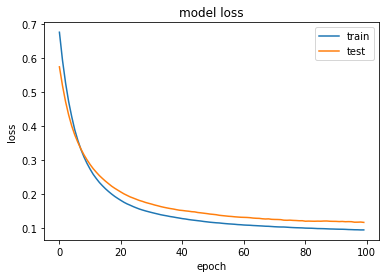

In [47]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [48]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

Сделаем прогнозирование, порог оставил прежний.

In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[108   0]
 [  4  11]]


Построив таблицу сопряженности, видим, что она стала лучше (было 8 неверно распознанных объектов, стало 4). При этом я увеличил количество нейронов на 1ом слое до 10.